In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('abc').getOrCreate()
spark

In [11]:
# IMPORT LIBRARIES
import pyspark
import matplotlib
import matplotlib.pyplot as plt
from pyspark.sql import Row
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *
import atexit
from numpy import array
import numpy as np
import datetime

In [3]:
df = spark.read.parquet('s3://sec-finc/pivot_data_vfinal/')

In [6]:
df

DataFrame[company_name: string, assigned_sic: int, document_fiscal_year_focus: int, CostOfGoodsAndServicesSold: double, CostOfGoodsSold: double, CostOfServices: double, EarningsPerShareBasic: double, EarningsPerShareDiluted: double, GainLossOnDispositionOfAssets: double, GeneralAndAdministrativeExpense: double, IncomeTaxesPaid: double, IncreaseDecreaseInAccountsPayable: double, IncreaseDecreaseInAccountsReceivable: double, IncreaseDecreaseInAccruedLiabilities: double, IncreaseDecreaseInInventories: double, LaborAndRelatedExpense: double, NetCashProvidedByUsedInFinancingActivities: double, NetCashProvidedByUsedInFinancingActivitiesContinuingOperations: double, NetCashProvidedByUsedInInvestingActivities: double, NetCashProvidedByUsedInInvestingActivitiesContinuingOperations: double, NetCashProvidedByUsedInOperatingActivities: double, NetCashProvidedByUsedInOperatingActivitiesContinuingOperations: double, NetIncomeLoss: double, OperatingExpenses: double, OperatingIncomeLoss: double, Payme

In [29]:
df.cache()

DataFrame[company_name: string, assigned_sic: int, document_fiscal_year_focus: int, CostOfGoodsAndServicesSold: double, CostOfGoodsSold: double, CostOfServices: double, EarningsPerShareBasic: double, EarningsPerShareDiluted: double, GainLossOnDispositionOfAssets: double, GeneralAndAdministrativeExpense: double, IncomeTaxesPaid: double, IncreaseDecreaseInAccountsPayable: double, IncreaseDecreaseInAccountsReceivable: double, IncreaseDecreaseInAccruedLiabilities: double, IncreaseDecreaseInInventories: double, LaborAndRelatedExpense: double, NetCashProvidedByUsedInFinancingActivities: double, NetCashProvidedByUsedInFinancingActivitiesContinuingOperations: double, NetCashProvidedByUsedInInvestingActivities: double, NetCashProvidedByUsedInInvestingActivitiesContinuingOperations: double, NetCashProvidedByUsedInOperatingActivities: double, NetCashProvidedByUsedInOperatingActivitiesContinuingOperations: double, NetIncomeLoss: double, OperatingExpenses: double, OperatingIncomeLoss: double, Payme

In [77]:
table = df.createOrReplaceTempView("table1")

In [78]:
# NetIncomeLoss, ResearchAndDevelopmentExpense
pl_dat = spark.sql("""SELECT NetIncomeLoss, ResearchAndDevelopmentExpense
                    From table1""")

In [ ]:
pl_dat.collect()

In [80]:
pl_dat = pl_dat.toPandas()

In [81]:
pl_dat

,NetIncomeLoss,ResearchAndDevelopmentExpense
0,130110000.0,NaN
1,-4000.0,NaN
2,200445000.0,53403000.0
3,82688000.0,76898000.0
4,NaN,NaN
...,...,...
41736,-39697960.0,NaN
41737,NaN,NaN
41738,-414911000.0,NaN
41739,-83580.0,NaN


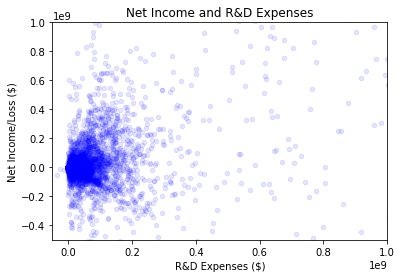

In [112]:
# Scatterplot: NetIncomeLoss by ResearchAndDevelopmentExpense
ax = pl_dat.plot(kind='scatter', x= 'ResearchAndDevelopmentExpense', y = 'NetIncomeLoss', c='blue', alpha = 0.10)
ax.set_title('Net Income and R&D Expenses')
ax.set_xlabel('R&D Expenses ($)')
ax.set_ylabel('Net Income/Loss ($)')
plt.xlim(-0.05*(10**9), 1*(10**9))
plt.ylim(-0.5*(10**9), 1*(10**9))
plt.show()

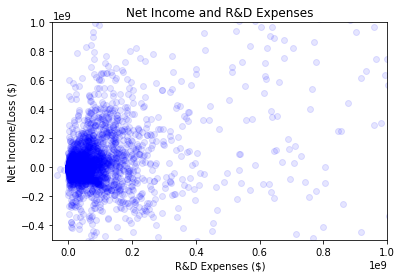

In [121]:
# Scatterplot: NetIncomeLoss by ResearchAndDevelopmentExpense
y = pl_dat.NetIncomeLoss
x = pl_dat.ResearchAndDevelopmentExpense

fig, ax = plt.subplots()
ax.scatter(x, y, c='blue', alpha = 0.10)
ax.set_title('Net Income and R&D Expenses')
ax.set_xlabel('R&D Expenses ($)')
ax.set_ylabel('Net Income/Loss ($)')
ax.set_xlim(-0.05*(10**9), 1*(10**9))
ax.set_ylim(-0.5*(10**9), 1*(10**9))

fig.savefig('Net Income and R&D Expenses.png')

In [102]:
# NetIncomeLoss, Revenue
pl_dat2 = spark.sql("""SELECT NetIncomeLoss, Revenues
                    From table1""")

In [103]:
pl_dat2 = pl_dat2.toPandas()

In [104]:
pl_dat2

,NetIncomeLoss,Revenues
0,130110000.0,4.026477e+09
1,-4000.0,NaN
2,200445000.0,NaN
3,82688000.0,NaN
4,NaN,5.630700e+08
...,...,...
41736,-39697960.0,NaN
41737,NaN,NaN
41738,-414911000.0,NaN
41739,-83580.0,NaN


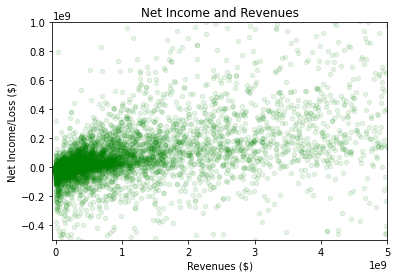

In [105]:
# Scatterplot: NetIncomeLoss by Revenues
ax = pl_dat2.plot(kind='scatter', x= 'Revenues', y = 'NetIncomeLoss', c='green', alpha = 0.10)
ax.set_title('Net Income and Revenues')
ax.set_xlabel('Revenues ($)')
ax.set_ylabel('Net Income/Loss ($)')
plt.xlim(-0.05*(10**9), 5*(10**9))
plt.ylim(-0.5*(10**9), 1*(10**9))
plt.show()

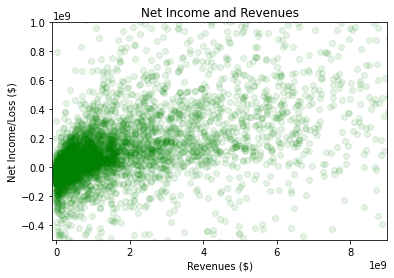

In [133]:
# Scatterplot: NetIncomeLoss by Revenues
y = pl_dat2.NetIncomeLoss
x = pl_dat2.Revenues

fig, ax = plt.subplots()
ax.scatter(x, y, c='green', alpha = 0.10)
ax.set_title('Net Income and Revenues')
ax.set_xlabel('Revenues ($)')
ax.set_ylabel('Net Income/Loss ($)')
ax.set_xlim(-0.1*(10**9), 9*(10**9))
ax.set_ylim(-0.5*(10**9), 1*(10**9))

fig.savefig('Net Income and Revenues.png')